<a href="https://colab.research.google.com/github/hdavidoff/datathon23/blob/hannah/Summary_exploration_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
artists = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artist.parquet.gzip')

import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_AI_gen(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [ ]:
artists.head(3)

,id,name,url,summary,picture,birthplace,deathplace,birthdate,deathdate,cause_of_death
0,0,Vincent Van Gogh,http://wikigallery.org/wiki/artist36933/Vincen...,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,0.0,0.0,342.0,1853-03-30,1890-07-29,Gunshot wound
1,1,Pierre Auguste Renoir,http://wikigallery.org/wiki/artist39254/Pierre...,Pierre-Auguste Renoir (French: [pjɛʁ oɡyst ʁən...,1.0,1.0,343.0,1841-02-25,1919-12-03,None
2,2,Claude Oscar Monet,http://wikigallery.org/wiki/artist39249/Claude...,"Oscar-Claude Monet (UK: , US: , French: [klod ...",2.0,2.0,344.0,1840-11-14,1926-12-05,None


In [ ]:
artworks.head(5)


,id,name,url,image_url,artist,rating,summary,year,medium,location
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,None,NaN,NaN,None
2,2,A Digger,http://wikigallery.org/wiki/painting_132953/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,None,NaN,NaN,None
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None


In [ ]:
artist_sel = artists.iloc[:,:2]
artist_sel

,id,name
0,0,Vincent Van Gogh
1,1,Pierre Auguste Renoir
2,2,Claude Oscar Monet
3,3,Fernando Botero
4,4,Jean-Léon Gérôme
...,...,...
611,611,Carlo Cignani
612,612,Utagawa Toyohiro
613,613,Tobias van Haecht
614,614,Adam van Noort


In [ ]:
art_art = pd.merge(artworks,artist_sel,left_on='artist',right_on='id',how='left')
art_art.head()

,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,None,NaN,NaN,None,0,Vincent Van Gogh
2,2,A Digger,http://wikigallery.org/wiki/painting_132953/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,None,NaN,NaN,None,0,Vincent Van Gogh
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None,0,Vincent Van Gogh
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None,0,Vincent Van Gogh


In [ ]:
val = 9

In [ ]:
artworks.url.values[val]

'http://wikigallery.org/wiki/painting_14451/Vincent-Van-Gogh/The-Bedroom'

In [ ]:
artworks.summary.values[val]

'In the Bedroom is a 2001 American independent drama film directed by Todd Field from a screenplay written by Field and Robert Festinger, based on the 1979 short story "Killings" by Andre Dubus. It stars Sissy Spacek, Tom Wilkinson, Nick Stahl, Marisa Tomei, and William Mapother. The film centers on the inner dynamics of a family in transition. Matt Fowler (Wilkinson) is a doctor practicing in Maine and is married to Ruth Fowler (Spacek), a music teacher. Their son Frank (Stahl) is involved in a love affair with an older single mother, Natalie Strout (Tomei). As the beauty of Maine\'s brief and fleeting summer comes to an end, these characters find themselves in the midst of an unimaginable tragedy.\nThe title refers to the rear compartment of a lobster trap known as the "bedroom" and how it can hold only two lobsters before the lobsters begin to turn on each other. In the Bedroom premiered at the Sundance Film Festival. It was theatrically released in limited theatres on November 23, 

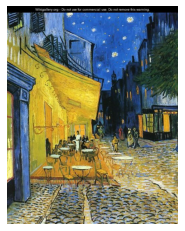

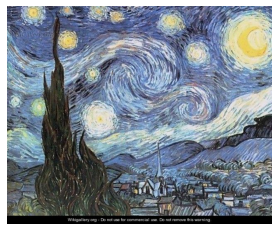

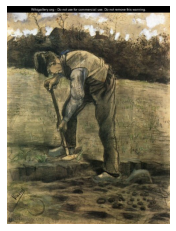

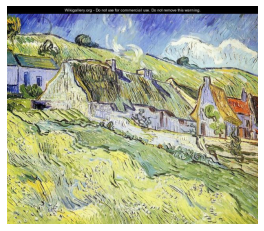

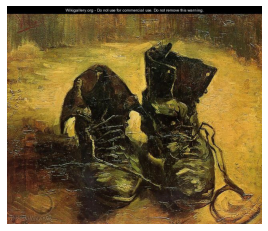

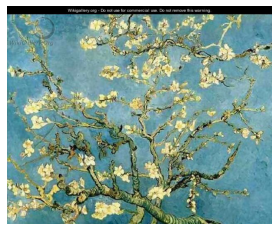

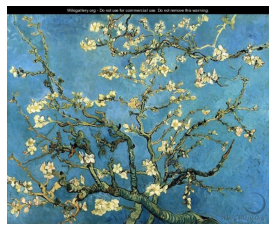

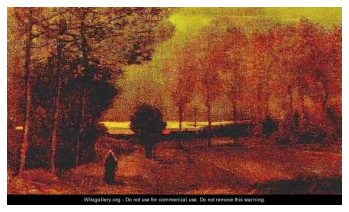

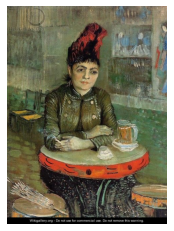

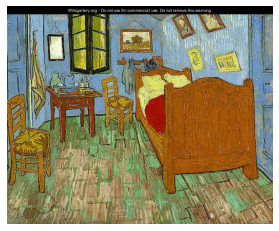

In [ ]:
for val in range(0,10):
  display_artwork(artworks.image_url.values[val])

In [ ]:
for val in range(30,100):
  print("title: ",artworks.name.values[val])
  print("summary: ",artworks.summary.values[val])
  #display_artwork(artworks.image_url.values[val])

title:  A Bowlful Of Roses
summary:  None
title:  Roses And Jasmine In A Delft Vase
summary:  None
title:  A Road In Louveciennes
summary:  Louveciennes (French pronunciation: [luv(ə)sjɛn] (listen)) is a commune in the Yvelines department in the Île-de-France region in north-central France. It is located in the western suburbs of Paris, between Versailles and Saint-Germain-en-Laye, and adjacent to Marly-le-Roi.
title:  Le Pont Neuf Paris
summary:  The Pont Neuf (French pronunciation: ​[pɔ̃ nœf], "New Bridge") is the oldest standing bridge across the river Seine in Paris, France. It stands by the western (downstream) point of the Île de la Cité, the island in the middle of the river that was, between 250 and 225 BC, the birthplace of Paris, then known as Lutetia and, during the medieval period, the heart of the city.
The bridge is composed of two separate spans, one of five arches joining the left bank to the Île de la Cité, another of seven joining the island to the right bank. Old eng

In [ ]:
## count the number of None summaries in the data
artworks.count() ## 10517 --> 6761

id           10517
name         10517
url          10517
image_url    10517
artist       10517
rating        4546
summary       6761
year           261
medium         526
location       704
dtype: int64

In [ ]:
art_filt = art_art.loc[art_art['summary'].str.contains('paint|draw',na=False)]

In [ ]:
for val in range(0,100):
  print("title: ",art_filt.name_x.values[val])
  print("summary: ",art_filt.summary.values[val])

title:  Cafe Terrace on the Place du Forum
summary:  Café Terrace at Night is an 1888 oil painting by the Dutch artist Vincent van Gogh. It is also known as The Cafe Terrace on the Place du Forum, and, when first exhibited in 1891, was entitled Coffeehouse, in the evening (Café, le soir).
Van Gogh painted Café Terrace at Night in Arles, France, in mid-September 1888. The painting is not signed, but described and mentioned by the artist in three letters.Visitors to the site can stand at the north eastern corner of the Place du Forum, where the artist set up his easel. The site was refurbished in 1990 and 1991 to replicate van Gogh's painting. He looked south towards the artificially lit terrace of the popular coffee house, as well as into the enforced darkness of the rue du Palais which led up to a building structure (to the left, not pictured) and, beyond this structure, the tower of a former church which is now Musée Lapidaire.
Towards the right, Van Gogh indicated a lighted shop and 

In [ ]:
art_filt.count()

id_x         1780
name_x       1780
url          1780
image_url    1780
artist       1780
rating        805
summary      1780
year          245
medium        503
location      590
id_y         1780
name_y       1780
dtype: int64

In [ ]:
art_filt_ln = art_filt
art_filt_ln['ln_split'] = art_filt['name_y'].str.split(' ')
art_filt_ln['last_name'] = art_filt_ln.ln_split.apply(lambda x:x[-1])
art_filt_ln.head()

<ipython-input-13-767059f2e587>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_ln['ln_split'] = art_filt['name_y'].str.split(' ')
<ipython-input-13-767059f2e587>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_ln['last_name'] = art_filt_ln.ln_split.apply(lambda x:x[-1])


,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Peach Trees in Blossom is an 1899 painting by ...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh


In [ ]:
art_filt_2 = art_filt_ln
art_filt_2['ln_in_sum'] = art_filt_2.apply(lambda x: x.last_name in x.summary, axis =1)
art_filt_2.head()

<ipython-input-14-28ebf24047b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_2['ln_in_sum'] = art_filt_2.apply(lambda x: x.last_name in x.summary, axis =1)


,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Peach Trees in Blossom is an 1899 painting by ...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True


In [ ]:
for val in range(300,310):
  if art_filt_2.ln_in_sum.values[val] == True:
    print("title: ",art_filt_2.name_x.values[val])
    print("summary: ",art_filt_2.summary.values[val])

title:  The Parable of the Blind Leading the Blind
summary:  The Blind Leading the Blind, Blind, or The Parable of the Blind (Dutch: De parabel der blinden) is a painting by the Netherlandish Renaissance artist Pieter Bruegel the Elder, completed in 1568.  Executed in distemper on linen canvas, it measures 86 cm × 154 cm (34 in × 61 in).  It depicts the Biblical parable of the blind leading the blind from the Gospel of Matthew 15:14, and is in the collection of the Museo di Capodimonte in Naples, Italy.
The painting reflects Bruegel's mastery of observation. Each figure has a different eye affliction, including corneal leukoma, atrophy of globe and removed eyes. The men hold their heads aloft to make better use of their other senses. The diagonal composition reinforces the off-kilter motion of the six figures falling in progression. It is considered a masterwork for its accurate detail and composition. Copies include a larger version by Bruegel's son Pieter Brueghel the Younger, and th

In [ ]:
art_filt_2.loc[art_filt_2['ln_in_sum']==True].count()

id_x         544
name_x       544
url          544
image_url    544
artist       544
rating       301
summary      544
year         130
medium       217
location     249
id_y         544
name_y       544
ln_split     544
last_name    544
ln_in_sum    544
dtype: int64

Maybe I should try it the other way around, first if it contains the last name of the artist...maybe that will give more results

In [ ]:
art_filt_ln2 = art_art
art_filt_ln2['ln_split'] = art_art['name_y'].str.split(' ')
art_filt_ln2['last_name'] = art_filt_ln2.ln_split.apply(lambda x:x[-1])
art_filt_ln2.head()

,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,None,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
2,2,A Digger,http://wikigallery.org/wiki/painting_132953/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,None,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh


In [ ]:
art_filt_ln2.count()

id_x         10517
name_x       10517
url          10517
image_url    10517
artist       10517
rating        4546
summary       6761
year           261
medium         526
location       704
id_y         10517
name_y       10517
ln_split     10517
last_name    10517
dtype: int64

In [ ]:
art_filt_2_ln = art_filt_ln2
art_filt_2_ln = art_filt_2_ln[~art_filt_2_ln['summary'].isnull()]
art_filt_2_ln['ln_in_sum'] = art_filt_2_ln.apply(lambda x: x.last_name in x.summary, axis =1)
art_filt_2_ln.head()

<ipython-input-18-9c7029929b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_2_ln['ln_in_sum'] = art_filt_2_ln.apply(lambda x: x.last_name in x.summary, axis =1)


,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,False
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,False
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True


In [ ]:
art_filt_2_ln.loc[art_filt_2_ln['ln_in_sum']==True].count() ## take rows where last name of artist is present in summary

id_x                 616
name_x               616
url                  616
image_url            616
artist               616
rating               341
summary              616
year                 136
medium               223
location             256
id_y                 616
name_y               616
ln_split             616
last_name            616
ln_in_sum            616
paint                616
paintdrawportrait    616
dtype: int64

It seems like there are 616 - 544 summaries that don't have the word part 'paint' or 'draw' in them...

In [ ]:
art_filt_2_ln['paint'] = art_filt_2_ln['summary'].str.contains('paint|draw',na=False)
art_filt_2_ln['paintdrawportrait'] = art_filt_2_ln['summary'].str.contains('paint|draw|portrait|poster|etching',na=False)

art_filt_2_ln.head()

<ipython-input-22-e0e700f88e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_2_ln['paint'] = art_filt_2_ln['summary'].str.contains('paint|draw',na=False)
<ipython-input-22-e0e700f88e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_2_ln['paintdrawportrait'] = art_filt_2_ln['summary'].str.contains('paint|draw|portrait|poster|etching',na=False)


,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum,paint,paintdrawportrait
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,False,False,False
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,False,False,False
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True


In [ ]:
art_weird = art_filt_2_ln.loc[(art_filt_2_ln['ln_in_sum']==True) & (art_filt_2_ln['paintdrawportrait']==False)]
art_weird.head()

,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum,paint,paintdrawportrait
15,15,Bank Of The Oise At Auvers,http://wikigallery.org/wiki/painting_14336/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Auvers-sur-Oise (French pronunciation: [ovɛʁ s...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,False,False
741,741,Antoinette At Her Dressing Table,http://wikigallery.org/wiki/painting_121908/Ma...,https://kuleuven-datathon-2023.s3.eu-central-1...,29,NaN,The following is a list of works by Mary Cassa...,NaN,NaN,None,29,Mary Cassatt,"[Mary, Cassatt]",Cassatt,True,False,False
742,742,Ellen Mary Cassatt In A White Coat,http://wikigallery.org/wiki/painting_121877/Ma...,https://kuleuven-datathon-2023.s3.eu-central-1...,29,NaN,The following is a list of works by Mary Cassa...,NaN,NaN,None,29,Mary Cassatt,"[Mary, Cassatt]",Cassatt,True,False,False
924,924,Landscape In Greece,http://wikigallery.org/wiki/painting_113730/Fr...,https://kuleuven-datathon-2023.s3.eu-central-1...,36,10.0,"Greece, officially the Hellenic Republic, is a...",NaN,NaN,None,36,Frederic Edwin Church,"[Frederic, Edwin, Church]",Church,True,False,False
1350,1350,"Satan, Sin, and Death- Satan Comes to the Gate...",http://wikigallery.org/wiki/painting_68685/Wil...,https://kuleuven-datathon-2023.s3.eu-central-1...,54,6.0,William Blake illustrated Paradise Lost more o...,NaN,NaN,None,54,William Blake,"[William, Blake]",Blake,True,False,False


In [ ]:
art_weird.count()

id_x                 57
name_x               57
url                  57
image_url            57
artist               57
rating               29
summary              57
year                  2
medium                4
location              5
id_y                 57
name_y               57
ln_split             57
last_name            57
ln_in_sum            57
paint                57
paintdrawportrait    57
dtype: int64

In [ ]:
for val in range(0,len(art_weird)):
    print("title: ",art_weird.name_x.values[val])
    print("artist: ",art_weird.name_y.values[val])
    print("summary: ",art_weird.summary.values[val])

title:  Bank Of The Oise At Auvers
artist:  Vincent Van Gogh
summary:  Auvers-sur-Oise (French pronunciation: [ovɛʁ syʁ waz] (listen), literally Auvers on Oise) is a commune in the department of Val-d'Oise, on the northwestern outskirts of Paris, France. It is located 27.2 km (16.9 mi) from the centre of Paris. It is associated with several famous artists, the most prominent being Vincent van Gogh. This was the place where van Gogh died, apparently by suicide.
title:  Moulin Rouge La Goulue
artist:  Henri De Toulouse-Lautrec
summary:  Moulin Rouge: La Goulue is a poster by French artist Henri de Toulouse-Lautrec. It is a colour lithograph from 1891, probably printed in about 3,000 copies, advertising the famous dancers La Goulue and "No-Bones" Valentin, and the new Paris dance hall Moulin Rouge.  Although most examples were pasted as advertising posters and lost, surviving examples are in the collection of the Indianapolis Museum of Art and many other institutions.
title:  Antoinette A

Starting keyword extraction

In [ ]:
!pip install git+https://github.com/LIAAD/yake
import yake
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('omw-1.4')
# Instantiate
lemmatizer = WordNetLemmatizer()


## code source: https://medium.com/@y.s.yoon/nlp-illustration-in-python-extracting-keywords-e9c4a6e0a267

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-4av8cjrs
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-4av8cjrs
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=62600 sha256=bcc2d539677d58069b48fdc52f3d8a2f84aeede31c78d7cb466aa889c97297f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-qp68g0l6/wheels/91/6a/18/ab7d2fc1e58b6ed936dbe90881425aea909bae3f98dae32f66
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77915 sha256=b85591ed83a47566cbfa84a9e83643c0b41e7cf2b5d85f534c622b3792c642e2
  Stored in director

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
for_summ = art_filt_2_ln.loc[art_filt_2_ln['ln_in_sum']==True]

In [ ]:
for_summ.count()

id_x                 616
name_x               616
url                  616
image_url            616
artist               616
rating               341
summary              616
year                 136
medium               223
location             256
id_y                 616
name_y               616
ln_split             616
last_name            616
ln_in_sum            616
paint                616
paintdrawportrait    616
dtype: int64

In [ ]:
## should probably do the keyword extraction per summary and then weight by price

In [ ]:
## first pre-process
## lowercase
## remove punctuation and number
## tokenize
## remove stop words
## lemmatization
nltk.download('stopwords')
# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits + '-'+'’'+'”'+'–'
# Print the exclusion list
print(exclist)

stop_words = ("a is an the are at of and in wa by on it to with from for that which or also ha - but de who been").split() ## initialize as blank, not sure which words should be in here
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append('du')


def clean_text(text):
  text = text.lower()

  text = text.translate(str.maketrans("","",exclist))

  #text = text.replace

  
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789-’”–


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for_summ['summary'] = for_summ.apply(lambda row: clean_text(row['summary']),axis=1)
for_summ.head()

,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum,paint,paintdrawportrait
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,café terrace night oil painting dutch artist v...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,almond blossom group several painting made vin...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,agostina segatori sitting café tambourin paint...,1887.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,peach tree blossom painting vincent van gogh c...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
15,15,Bank Of The Oise At Auvers,http://wikigallery.org/wiki/painting_14336/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,auverssuroise french pronunciation ovɛʁ syʁ wa...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,False,False


In [ ]:
## remove duplicates first
import numpy as np

In [ ]:
for_summ = for_summ.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep

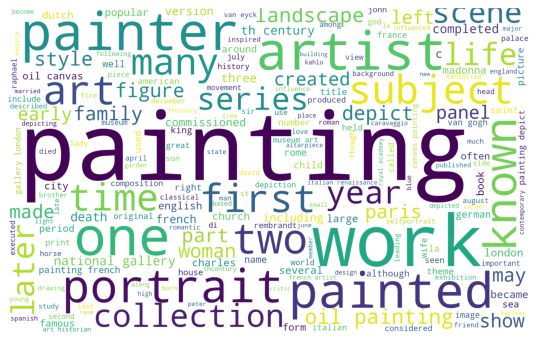

In [ ]:
# Import library
from wordcloud import WordCloud
from collections import Counter
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
art_sum = wc.generate(for_summ['summary'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(art_sum);

In [ ]:
for_summ.head()

,id_x,name_x,url,image_url,artist,rating,summary,year,medium,location,id_y,name_y,ln_split,last_name,ln_in_sum,paint,paintdrawportrait
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,café terrace night oil painting dutch artist v...,1888.0,0.0,Kröller-Müller Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,almond blossom group several painting made vin...,1890.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,agostina segatori sitting café tambourin paint...,1887.0,0.0,Van Gogh Museum,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,peach tree blossom painting vincent van gogh c...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,True,True
15,15,Bank Of The Oise At Auvers,http://wikigallery.org/wiki/painting_14336/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,auverssuroise french pronunciation ovɛʁ syʁ wa...,NaN,NaN,None,0,Vincent Van Gogh,"[Vincent, Van, Gogh]",Gogh,True,False,False


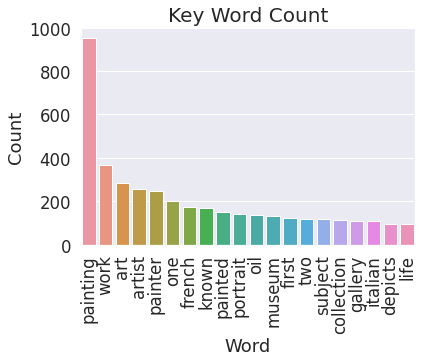

In [ ]:
import seaborn as sns
# Bar plot - Create a corpus of disclosures
corpus = []
for summs in for_summ['summary'].tolist():
    for word in summs.split():
        corpus.append(word)
# Bar plot - Create a dataframe of the most common 30 words
common_words = pd.DataFrame(Counter(corpus).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.set(font_scale = 1.5)
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()

In [ ]:
all_summs = for_summ['summary'].str.cat(sep=" ")
all_summs

'café terrace night oil painting dutch artist vincent van gogh known cafe terrace place forum first exhibited entitled coffeehouse evening café le soir van gogh painted café terrace night arles france midseptember painting signed described mentioned artist three lettersvisitors site stand north eastern corner place forum artist set easel site refurbished replicate van gogh painting looked south towards artificially lit terrace popular coffee house well enforced darkness rue palais led building structure left pictured beyond structure tower former church musée lapidaire towards right van gogh indicated lighted shop branch tree surrounding place omitted remainder roman monument beside little shop painting currently kröllermüller museum otterlo netherlands almond blossom group several painting made vincent van gogh arles saintrémy southern france blossoming almond tree flowering tree special van gogh represented awakening hope enjoyed aesthetically found joy painting flowering tree work r

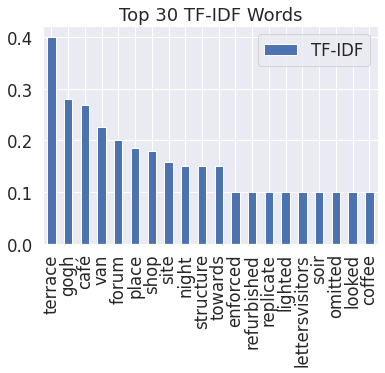

In [ ]:
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf = vectorizer.fit_transform(for_summ['summary'])
# Create a dataframe of TFIDF
tfidf_df = pd.DataFrame(tfidf[0].T.todense(), 
                      index=vectorizer.get_feature_names_out(), 
                      columns=["TF-IDF"])
# Sort
tfidf_df = tfidf_df.sort_values('TF-IDF', ascending=False)
# Bar Plot
tfidf_df[:20].plot.bar(title="Top 30 TF-IDF Words");


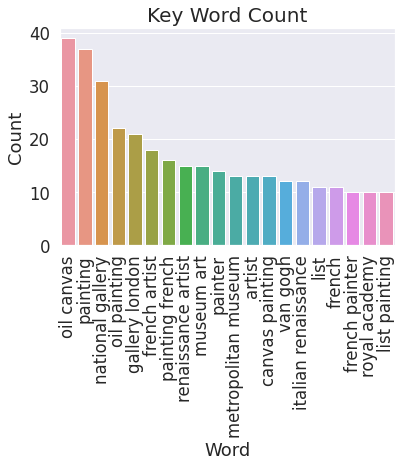

In [ ]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)
# Extract keywords and scores from each disclosure
keywords = for_summ['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()

# Add in price data

In [ ]:
art_with_prices = pd.read_csv('/content/artworks_with_prices_findartinfo.csv')
art_with_prices.head()

,id,name,url,image_url,artist,rating,summary,year,medium,location,artist_name,price,price_name
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,Vincent Van Gogh,238784.0,Portrait Du Docteur Gachet: L'homme À La Pipe
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,NaN,NaN,NaN,NaN,Vincent Van Gogh,325.0,Starry Night
2,2,A Digger,http://wikigallery.org/wiki/painting_132953/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,NaN,NaN,NaN,NaN,Vincent Van Gogh,NaN,NaN
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,Vincent Van Gogh,599224.0,Groupe De Pins
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,Vincent Van Gogh,8976000.0,A Pair Of Shoes


In [ ]:
art_with_prices.count()

id             10517
name           10517
url            10517
image_url      10517
artist         10517
rating          4546
summary         6754
year             261
medium           526
location         636
artist_name    10517
price           6547
price_name      6547
dtype: int64

In [ ]:
art_with_ps = art_with_prices.loc[(art_with_prices['price_name'].notnull())&(art_with_prices['summary'].notnull())]
art_with_ps.count()

id             4270
name           4270
url            4270
image_url      4270
artist         4270
rating         1925
summary        4270
year            179
medium          369
location        420
artist_name    4270
price          4270
price_name     4270
dtype: int64

In [ ]:
for val in range(0,3):
  print("Artwork name: ",art_with_ps['name'].values[val])
  print("Price name: ",art_with_ps['price_name'].values[val])
  print("Price: ",art_with_ps['price'].values[val])
  print("Artist name: ",art_with_ps['artist_name'].values[val])

Artwork name:  Cafe Terrace on the Place du Forum
Price name:  Portrait Du Docteur Gachet: L'homme À La Pipe
Price:  238784.0
Artist name:  Vincent Van Gogh
Artwork name:  A Group of Cottages
Price name:  Groupe De Pins
Price:  599224.0
Artist name:  Vincent Van Gogh
Artwork name:  A Pair of Shoes
Price name:  A Pair Of Shoes
Price:  8976000.0
Artist name:  Vincent Van Gogh


In [ ]:
stop_words = ("a is an the are at of and in wa by on it to with from for that which or also ha - but de who been").split() ## initialize as blank, not sure which words should be in here
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append('du')
stop_words.append('au')
stop_words.append('de')
stop_words.append('à')
stop_words.append('la')


def clean_text(text):
  text = text.lower()

  text = text.translate(str.maketrans("","",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

In [ ]:
## clean the artwork names and price names, get rid of punctuation and filler words, are the words of the artwork present in the price name...what to do about different languages
art_with_ps['name'] = art_with_ps.apply(lambda row: clean_text(row['name']),axis=1)
art_with_ps['price_name'] = art_with_ps.apply(lambda row: clean_text(row['price_name']),axis=1)
#for val in range(0,10):
#  print("Artwork name: ",art_with_ps['name'].values[val])
#  print("length artwork name: ",len(art_with_ps['name'].values[val].split()))
#  print("Price name: ",art_with_ps['price_name'].values[val])
#  print("Price: ",art_with_ps['price'].values[val])
#  print("Artist name: ",art_with_ps['artist_name'].values[val])

<ipython-input-72-a90fbf59cfd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_with_ps['name'] = art_with_ps.apply(lambda row: clean_text(row['name']),axis=1)
<ipython-input-72-a90fbf59cfd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_with_ps['price_name'] = art_with_ps.apply(lambda row: clean_text(row['price_name']),axis=1)


In [ ]:
art_with_ps['len_name'] = art_with_ps.apply(lambda row: len(row['name'].split()),axis=1)
art_with_ps.head()

<ipython-input-73-ea931595ba3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_with_ps['len_name'] = art_with_ps.apply(lambda row: len(row['name'].split()),axis=1)


,id,name,url,image_url,artist,rating,summary,year,medium,location,artist_name,price,price_name,len_name
0,0,cafe terrace place forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,Vincent Van Gogh,238784.0,portrait docteur gachet lhomme pipe,4
3,3,group cottage,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,Vincent Van Gogh,599224.0,groupe pin,2
4,4,pair shoe,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,Vincent Van Gogh,8976000.0,pair shoe,2
5,5,blossoming almond tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,Vincent Van Gogh,50.0,almond blossom glass,3
6,6,branch almond blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,Vincent Van Gogh,50.0,almond blossom glass,3


In [ ]:
## count number of matching words between name and price name
def count_match_words(text1,text2):
  tokens1 = word_tokenize(text1)
  tokens2 = word_tokenize(text2)
  count_match = [1  for token in tokens1 if token in tokens2]
  sum_match = sum(count_match)
  perc_match = (sum_match/len(tokens1))*100

  return perc_match

In [ ]:
art_with_ps['match_perc'] = art_with_ps.apply(lambda row: count_match_words(row['name'],row['price_name']),axis=1)
art_with_ps.head()

<ipython-input-75-e15766f302a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_with_ps['match_perc'] = art_with_ps.apply(lambda row: count_match_words(row['name'],row['price_name']),axis=1)


,id,name,url,image_url,artist,rating,summary,year,medium,location,artist_name,price,price_name,len_name,match_perc
0,0,cafe terrace place forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,Vincent Van Gogh,238784.0,portrait docteur gachet lhomme pipe,4,0.000000
3,3,group cottage,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,Vincent Van Gogh,599224.0,groupe pin,2,0.000000
4,4,pair shoe,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,Vincent Van Gogh,8976000.0,pair shoe,2,100.000000
5,5,blossoming almond tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,Vincent Van Gogh,50.0,almond blossom glass,3,33.333333
6,6,branch almond blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,Vincent Van Gogh,50.0,almond blossom glass,3,66.666667


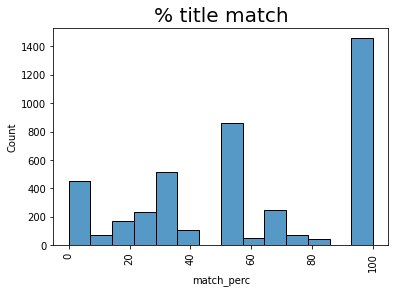

In [ ]:
import seaborn as sns
sns.histplot(x=art_with_ps['match_perc'])
plt.xticks(rotation='vertical')
plt.title("% title match", fontsize = 20)
plt.show()

In [ ]:
art_with_ps_good = art_with_ps.loc[art_with_ps['match_perc']>=50]
art_with_ps_good.count()

id             2725
name           2725
url            2725
image_url      2725
artist         2725
rating         1257
summary        2725
year            107
medium          241
location        269
artist_name    2725
price          2725
price_name     2725
len_name       2725
match_title       0
match_perc     2725
dtype: int64

In [ ]:
for val in range(0,3):
  print("art title: ",art_with_ps_good['name'].values[val])
  print("price title: ",art_with_ps_good['price_name'].values[val])
  print("match percentage : ",art_with_ps_good['match_perc'].values[val])

art title:  pair shoe
price title:  pair shoe
match percentage :  100.0
art title:  branch almond blossom
price title:  almond blossom glass
match percentage :  66.66666666666666
art title:  bedroom
price title:  artist bedroom
match percentage :  100.0


In [ ]:
## start from price dataset

dataset_for_summary_analysis = art_with_ps_good

art_filt_ln2 = dataset_for_summary_analysis
art_filt_ln2['ln_split'] = art_filt_ln2['artist_name'].str.split(' ')
art_filt_ln2['last_name'] = art_filt_ln2.ln_split.apply(lambda x:x[-1])
art_filt_2_ln = art_filt_ln2
art_filt_2_ln = art_filt_2_ln[~art_filt_2_ln['summary'].isnull()]
art_filt_2_ln['ln_in_sum'] = art_filt_2_ln.apply(lambda x: x.last_name in x.summary, axis =1)
for_summ = art_filt_2_ln.loc[art_filt_2_ln['ln_in_sum']==True] ## take rows where last name of artist is present in summary


In [ ]:
for_summ = for_summ.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep


In [ ]:
for_summ.count()

id             185
name           185
url            185
image_url      185
artist         185
rating         107
summary        185
year            49
medium          86
location        91
artist_name    185
price          185
price_name     185
len_name       185
match_title      0
match_perc     185
ln_split       185
last_name      185
ln_in_sum      185
dtype: int64

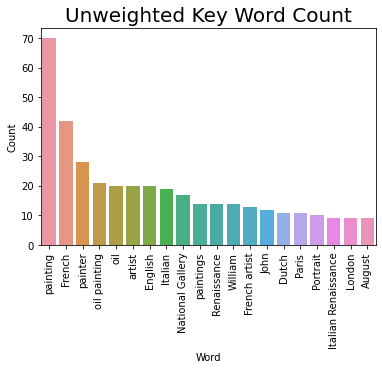

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)
# Extract keywords and scores from each disclosure
keywords = for_summ['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count", fontsize = 20)
plt.show()

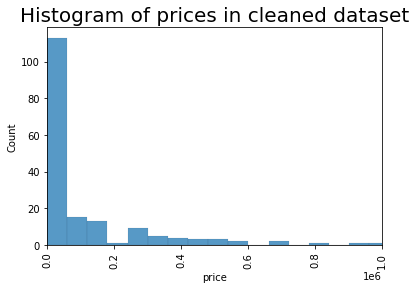

In [ ]:
sns.histplot(x=for_summ['price'])
plt.xticks(rotation='vertical')
plt.title("Histogram of prices in cleaned dataset", fontsize = 20)
plt.xlim([0,1000000])
plt.show()

In [ ]:
## ok maybe I should normalize the price data first
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
prices_arr = np.array(for_summ['price'])
prices_arr_tot = np.array(art_with_ps_good['price'])
min_price = for_summ['price'].min()
max_price = for_summ['price'].max()
for_summ['mmax_norm_price']=(for_summ['price']-min_price)/(max_price-min_price)
from scipy import stats
for_summ['price_percentile'] = for_summ.apply(lambda x: stats.percentileofscore(prices_arr, x.price), axis =1) # small reference
for_summ['price_percentile_tot'] = for_summ.apply(lambda x: stats.percentileofscore(prices_arr_tot, x.price), axis =1) # whole price reference

scaler = StandardScaler()
for_summ[['norm_price']]=scaler.fit_transform(for_summ[['price']])

In [ ]:
for_summ.head(5)

,id,name,url,image_url,artist,rating,summary,year,medium,location,...,len_name,match_title,match_perc,ln_split,last_name,ln_in_sum,mmax_norm_price,price_percentile,norm_price,price_percentile_tot
6,6,branch almond blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,...,3,None,66.666667,"[Vincent, Van, Gogh]",Gogh,True,0.000000,0.540541,-0.203026,0.220183
16,16,crab back,http://wikigallery.org/wiki/painting_14523/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Crab on its Back (Dutch: Een op zijn rug ligge...,NaN,0.0,Van Gogh Museum,...,2,None,50.000000,"[Vincent, Van, Gogh]",Gogh,True,0.019843,91.891892,0.004468,91.633028
36,36,luncheon boating party,http://wikigallery.org/wiki/painting_223143/Pi...,https://kuleuven-datathon-2023.s3.eu-central-1...,1,10.0,Luncheon of the Boating Party French: Le Déjeu...,NaN,0.0,NaN,...,3,None,100.000000,"[Pierre, Auguste, Renoir]",Renoir,True,0.000023,9.729730,-0.202786,9.174312
53,53,farmyard normandy,http://wikigallery.org/wiki/painting_83296/Cla...,https://kuleuven-datathon-2023.s3.eu-central-1...,2,2.0,This is an incomplete list of works by Claude ...,NaN,NaN,NaN,...,2,None,50.000000,"[Claude, Oscar, Monet]",Monet,True,0.000071,22.162162,-0.202284,18.532110
73,73,interior dinner,http://wikigallery.org/wiki/painting_109619/Cl...,https://kuleuven-datathon-2023.s3.eu-central-1...,2,8.0,"Interior, after Dinner (French: Intérieur, Apr...",NaN,0.0,National Gallery of Art,...,2,None,50.000000,"[Claude, Oscar, Monet]",Monet,True,0.000002,3.243243,-0.203002,1.302752


In [ ]:
expensive_paintings = for_summ.loc[for_summ['price_percentile']>= 90]
expensive_paintings.count()

id                      19
name                    19
url                     19
image_url               19
artist                  19
rating                  13
summary                 19
year                     4
medium                  11
location                11
artist_name             19
price                   19
price_name              19
len_name                19
match_title              0
match_perc              19
ln_split                19
last_name               19
ln_in_sum               19
mmax_norm_price         19
price_percentile        19
norm_price              19
price_percentile_tot    19
dtype: int64

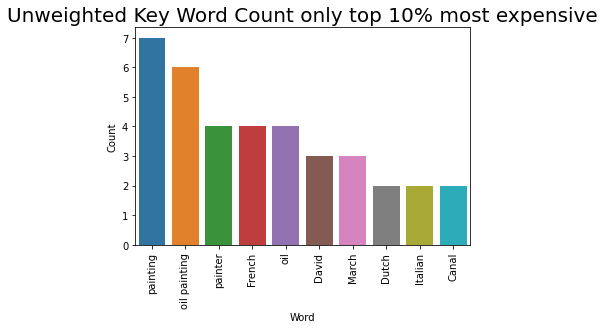

In [ ]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)
# Extract keywords and scores from each disclosure
keywords = expensive_paintings['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(10))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 10 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count only top 10% most expensive", fontsize = 20)
plt.show()

In [ ]:
## need to take into account the relative price relative to the total dataset, use total price array as reference for percentile calculation maybe?
## also check distribution of the prices in my dataset, does it somewhat match the distribution of prices in the total dataset?

In [ ]:
expensive_paintings_rel_tot = for_summ.loc[for_summ['price_percentile_tot']>= 90]
expensive_paintings_rel_tot.count()

id                      19
name                    19
url                     19
image_url               19
artist                  19
rating                  13
summary                 19
year                     4
medium                  11
location                11
artist_name             19
price                   19
price_name              19
len_name                19
match_title              0
match_perc              19
ln_split                19
last_name               19
ln_in_sum               19
mmax_norm_price         19
price_percentile        19
norm_price              19
price_percentile_tot    19
dtype: int64

In [ ]:
expensive_paintings_rel_tot.head(20)

,id,name,url,image_url,artist,rating,summary,year,medium,location,...,len_name,match_title,match_perc,ln_split,last_name,ln_in_sum,mmax_norm_price,price_percentile,norm_price,price_percentile_tot
16,16,crab back,http://wikigallery.org/wiki/painting_14523/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Crab on its Back (Dutch: Een op zijn rug ligge...,NaN,0.0,Van Gogh Museum,...,2,None,50.0,"[Vincent, Van, Gogh]",Gogh,True,0.019843,91.891892,0.004468,91.633028
500,500,regatta grand canal c,http://wikigallery.org/wiki/painting_104835/%2...,https://kuleuven-datathon-2023.s3.eu-central-1...,20,10.0,This is a list of works by Italian/Venetian re...,NaN,NaN,NaN,...,4,None,50.0,[Canaletto],Canaletto,True,0.151236,96.756757,1.378382,97.963303
660,660,valley yosemite,http://wikigallery.org/wiki/painting_115506/Al...,https://kuleuven-datathon-2023.s3.eu-central-1...,26,10.0,Valley of the Yosemite (or Valley of the Yo-Se...,1864.0,5.0,"Museum of Fine Arts, Boston",...,2,None,100.0,"[Albert, Bierstadt]",Bierstadt,True,0.205715,98.378378,1.948049,98.477064
707,707,death socrates,http://wikigallery.org/wiki/painting_238858/Ja...,https://kuleuven-datathon-2023.s3.eu-central-1...,28,10.0,The Death of Socrates (French: La Mort de Socr...,NaN,0.0,Metropolitan Museum of Art,...,2,None,100.0,"[Jacques, Louis, David]",David,True,0.016998,90.810811,-0.025282,90.825688
714,714,portrait charlotte david madame david,http://wikigallery.org/wiki/painting_118685/Ja...,https://kuleuven-datathon-2023.s3.eu-central-1...,28,NaN,Jacques-Louis David (French: [ʒaklwi david]; 3...,NaN,NaN,NaN,...,5,None,60.0,"[Jacques, Louis, David]",David,True,0.099206,96.216216,0.834329,97.247706
957,957,blue horse,http://wikigallery.org/wiki/painting_120442/Fr...,https://kuleuven-datathon-2023.s3.eu-central-1...,38,NaN,Blue Horse I is an oil painting by Franz Marc ...,1911.0,0.0,Städtische Galerie im Lenbachhaus,...,2,None,100.0,"[Franz, Marc]",Marc,True,0.180918,97.297297,1.688757,98.311927
1175,1175,beach trouville,http://wikigallery.org/wiki/painting_249539/Eu...,https://kuleuven-datathon-2023.s3.eu-central-1...,47,NaN,Trouville-sur-Mer (French pronunciation: [tʁuv...,NaN,NaN,NaN,...,2,None,50.0,"[Eugène, Boudin]",Boudin,True,0.023066,92.432432,0.038163,92.403670
2668,2668,letter introduction,http://wikigallery.org/wiki/painting_154482/Si...,https://kuleuven-datathon-2023.s3.eu-central-1...,114,6.0,Sir David Wilkie (18 November 1785 – 1 June 1...,NaN,NaN,NaN,...,2,None,50.0,"[Sir, David, Wilkie]",Wilkie,True,0.016221,90.270270,-0.033408,90.458716
2766,2766,entrance grand canal venice,http://wikigallery.org/wiki/painting_322368/%2...,https://kuleuven-datathon-2023.s3.eu-central-1...,120,NaN,"The Entrance to the Grand Canal, Venice, is an...",NaN,0.0,"Museum of Fine Arts, Houston",...,4,None,100.0,"[(after), (Giovanni, Antonio, Canal), Canaletto]",Canaletto,True,0.249104,98.918919,2.401748,98.807339
2910,2910,fall plowing,http://wikigallery.org/wiki/painting_241659/Gr...,https://kuleuven-datathon-2023.s3.eu-central-1...,130,10.0,Fall Plowing is a 1931 oil painting by Grant W...,1931.0,0.0,"Viola, Iowa",...,2,None,50.0,"[Grant, Wood]",Wood,True,0.199523,97.837838,1.883300,98.385321


# NEW SOURCE PRICES

In [ ]:
!pip install git+https://github.com/LIAAD/yake
import yake
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('omw-1.4')
nltk.download('stopwords')
# Instantiate
lemmatizer = WordNetLemmatizer()


## code source: https://medium.com/@y.s.yoon/nlp-illustration-in-python-extracting-keywords-e9c4a6e0a267

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-jphd92dq
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-jphd92dq
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
art_with_prices = pd.read_csv('/content/artworks_with_prices_v2.csv')
art_with_ps = art_with_prices.loc[(art_with_prices['price_name'].notnull())&(art_with_prices['summary'].notnull())]
art_with_ps.count()

id              4702
name            4702
url             4702
image_url       4702
artist          4702
rating          2075
summary         4702
year             185
medium           381
location         445
name_english    4702
artist_name     4702
price           4702
price_name      4702
dtype: int64

In [ ]:

dataset_for_summary_analysis = art_with_ps

art_filt_ln2 = dataset_for_summary_analysis
art_filt_ln2['ln_split'] = art_filt_ln2['artist_name'].str.split(' ')
art_filt_ln2['last_name'] = art_filt_ln2.ln_split.apply(lambda x:x[-1])
art_filt_2_ln = art_filt_ln2
art_filt_2_ln = art_filt_2_ln[~art_filt_2_ln['summary'].isnull()]
art_filt_2_ln['ln_in_sum'] = art_filt_2_ln.apply(lambda x: x.last_name in x.summary, axis =1)
for_summ = art_filt_2_ln.loc[art_filt_2_ln['ln_in_sum']==True].copy() ## take rows where last name of artist is present in summary
for_summ = for_summ.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep


<ipython-input-6-0e12e4431a69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_ln2['ln_split'] = art_filt_ln2['artist_name'].str.split(' ')
<ipython-input-6-0e12e4431a69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_filt_ln2['last_name'] = art_filt_ln2.ln_split.apply(lambda x:x[-1])


In [ ]:
for_summ.count()

id              356
name            356
url             356
image_url       356
artist          356
rating          198
summary         356
year             88
medium          144
location        155
name_english    356
artist_name     356
price           356
price_name      356
ln_split        356
last_name       356
ln_in_sum       356
dtype: int64

Clean the text from the name and price_name columns for matching.

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append('du')
stop_words.append('au')
stop_words.append('de')
stop_words.append('à')
stop_words.append('la')

# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits + '-'+'’'+'”'+'–'
# Print the exclusion list
print(exclist)


def clean_text(text):
  text = text.lower()

  text = text.translate(str.maketrans("","",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789-’”–


In [ ]:
for_summ['name_english'] = for_summ.apply(lambda row: clean_text(row['name_english']),axis=1)
for_summ['price_name'] = for_summ.apply(lambda row: clean_text(row['price_name']),axis=1)
for_summ.head()

,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name,ln_in_sum
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,Vincent Van Gogh,50.0,almond blossom glass,"[Vincent, Van, Gogh]",Gogh,True
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,agostina segatori sitting cafe tambourin,Vincent Van Gogh,669500.0,peasant woman halffigure sitting,"[Vincent, Van, Gogh]",Gogh,True
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Peach Trees in Blossom is an 1899 painting by ...,NaN,NaN,NaN,peach tree blossom,Vincent Van Gogh,110500.0,olive tree yellow sky vincent van gogh picture...,"[Vincent, Van, Gogh]",Gogh,True
16,16,Crab On Its Back,http://wikigallery.org/wiki/painting_14523/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Crab on its Back (Dutch: Een op zijn rug ligge...,NaN,0.0,Van Gogh Museum,crab back,Vincent Van Gogh,692248.0,house seen back window siens mother house,"[Vincent, Van, Gogh]",Gogh,True
18,18,Fishing Boats On The Beach At Saintes Maries,http://wikigallery.org/wiki/painting_14474/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Saintes-Maries is the subject of a series of p...,NaN,NaN,NaN,fishing boat beach saintes mary,Vincent Van Gogh,5062500.0,souvenir saintesmaries mediterrane boat beach ...,"[Vincent, Van, Gogh]",Gogh,True


In [ ]:
## count number of matching words between name_english and price name
def count_match_words(text1,text2):
  tokens1 = word_tokenize(text1)
  tokens2 = word_tokenize(text2)
  count_match = [1  for token in tokens1 if token in tokens2]
  sum_match = sum(count_match)
  perc_match = (sum_match/len(tokens1))*100

  return perc_match

In [ ]:
for_summ['match_perc'] = for_summ.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1)
for_summ.head()

,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name,ln_in_sum,match_perc
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,Vincent Van Gogh,50.0,almond blossom glass,"[Vincent, Van, Gogh]",Gogh,True,33.333333
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,agostina segatori sitting cafe tambourin,Vincent Van Gogh,669500.0,peasant woman halffigure sitting,"[Vincent, Van, Gogh]",Gogh,True,20.000000
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Peach Trees in Blossom is an 1899 painting by ...,NaN,NaN,NaN,peach tree blossom,Vincent Van Gogh,110500.0,olive tree yellow sky vincent van gogh picture...,"[Vincent, Van, Gogh]",Gogh,True,33.333333
16,16,Crab On Its Back,http://wikigallery.org/wiki/painting_14523/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,Crab on its Back (Dutch: Een op zijn rug ligge...,NaN,0.0,Van Gogh Museum,crab back,Vincent Van Gogh,692248.0,house seen back window siens mother house,"[Vincent, Van, Gogh]",Gogh,True,50.000000
18,18,Fishing Boats On The Beach At Saintes Maries,http://wikigallery.org/wiki/painting_14474/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Saintes-Maries is the subject of a series of p...,NaN,NaN,NaN,fishing boat beach saintes mary,Vincent Van Gogh,5062500.0,souvenir saintesmaries mediterrane boat beach ...,"[Vincent, Van, Gogh]",Gogh,True,40.000000


In [ ]:
artist_words = for_summ['artist_name'].str.cat(sep=" ")
artist_words = clean_text(artist_words)

def clean_text_summ(text):
  text = text.lower()

  text = text.translate(str.maketrans("","",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  # Remove artist name words
  tokens = [token for token in tokens if token not in artist_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

for_summ['summary'] = for_summ.apply(lambda row: clean_text_summ(row['summary']),axis=1)


In [ ]:
artist_words

'vincent van gogh vincent van gogh vincent van gogh vincent van gogh vincent van gogh vincent van gogh vincent van gogh pierre auguste renoir pierre auguste renoir claude oscar monet claude oscar monet claude oscar monet jeanléon gérôme rembrandt van rijn rembrandt van rijn john singer sargent john singer sargent john singer sargent john singer sargent gustav klimt gustav klimt gustav klimt joseph mallord william turner joseph mallord william turner joseph mallord william turner joseph mallord william turner joseph mallord william turner joseph mallord william turner raphael raphael raphael raphael raphael raphael francisco goya lucientes winslow homer winslow homer winslow homer eugene delacroix eugene delacroix eugene delacroix henri toulouselautrec henri toulouselautrec peter paul rubens peter paul rubens peter paul rubens peter paul rubens peter paul rubens peter paul rubens peter paul rubens camille pissarro camille pissarro paul gauguin paul gauguin paul gauguin edouard manet edo

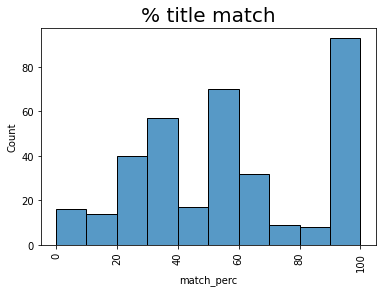

In [ ]:
import seaborn as sns
sns.histplot(x=for_summ['match_perc'])
plt.xticks(rotation='vertical')
plt.title("% title match", fontsize = 20)
plt.show()

In [ ]:
for_summ_40 = for_summ.loc[for_summ['match_perc']>=40]
for_summ_40.count()

id              229
name            229
url             229
image_url       229
artist          229
rating          128
summary         229
year             61
medium          100
location        103
name_english    229
artist_name     229
price           229
price_name      229
ln_split        229
last_name       229
ln_in_sum       229
match_perc      229
dtype: int64

In [ ]:
for_summ_40 = for_summ_40.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep
for_summ_40.count()

id              229
name            229
url             229
image_url       229
artist          229
rating          128
summary         229
year             61
medium          100
location        103
name_english    229
artist_name     229
price           229
price_name      229
ln_split        229
last_name       229
ln_in_sum       229
match_perc      229
dtype: int64

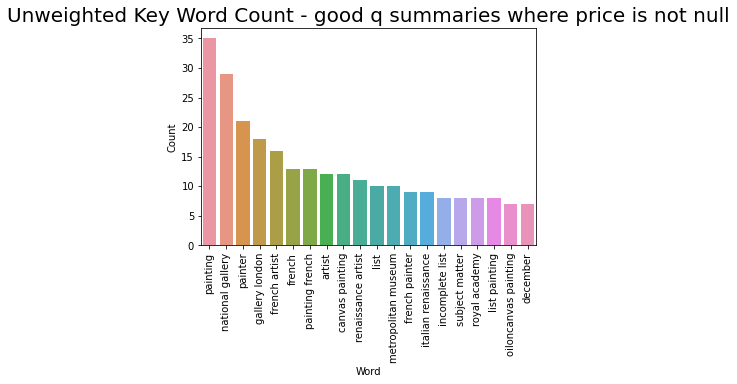

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)
# Extract keywords and scores from each disclosure
keywords = for_summ['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - good q summaries where price is not null", fontsize = 20)
plt.show()

Now look at only top X % expensive paintings

In [ ]:
art_with_ps.loc[:,'name_english'] = art_with_ps.apply(lambda row: clean_text(row['name_english']),axis=1).copy()
art_with_ps.loc[:,'price_name'] = art_with_ps.apply(lambda row: clean_text(row['price_name']),axis=1).copy()
art_with_ps.head()




/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,group cottage,Vincent Van Gogh,7500.0,group eight portrait sketch selfportrait vince...,"[Vincent, Van, Gogh]",Gogh
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,pair shoe,Vincent Van Gogh,10000000.0,pair shoe,"[Vincent, Van, Gogh]",Gogh
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,Vincent Van Gogh,50.0,almond blossom glass,"[Vincent, Van, Gogh]",Gogh
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,branch almond blossom,Vincent Van Gogh,50.0,almond blossom glass,"[Vincent, Van, Gogh]",Gogh
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Agostina Segatori Sitting in the Café du Tambo...,1887.0,0.0,Van Gogh Museum,agostina segatori sitting cafe tambourin,Vincent Van Gogh,669500.0,peasant woman halffigure sitting,"[Vincent, Van, Gogh]",Gogh


In [ ]:

art_with_ps.loc[:,'match_perc'] = art_with_ps.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
## take into all prices we could find after doing the matching check

import numpy as np
art_with_ps_good = art_with_ps.loc[art_with_ps['match_perc']>=50]
prices_arr_tot = np.array(art_with_ps_good['price'])
prices_arr = np.array(for_summ['price'])
from scipy import stats
for_summ_40['price_percentile'] = for_summ_40.apply(lambda x: stats.percentileofscore(prices_arr, x.price), axis =1) # small reference
for_summ_40['price_percentile_tot'] = for_summ_40.apply(lambda x: stats.percentileofscore(prices_arr_tot, x.price), axis =1) # whole price reference


for_summ_40_exp = for_summ_40.loc[for_summ_40['price_percentile_tot']>= 90]



In [ ]:
for_summ_40_exp.count()

id                      38
name                    38
url                     38
image_url               38
artist                  38
rating                  25
summary                 38
year                    11
medium                  16
location                18
name_english            38
artist_name             38
price                   38
price_name              38
ln_split                38
last_name               38
ln_in_sum               38
match_perc              38
price_percentile        38
price_percentile_tot    38
dtype: int64

In [ ]:
keywords.values[0]

[('saintesmaries', 0.11369206228658875),
 ('town', 0.11369206228658875),
 ('painting', 0.13453835116331675),
 ('made', 0.13453835116331675),
 ('subject', 0.18569843656348187),
 ('series', 0.18569843656348187),
 ('lived', 0.18569843656348187),
 ('trip', 0.18569843656348187),
 ('saintesmariesdelamer', 0.18569843656348187),
 ('mediterranean', 0.18569843656348187),
 ('sea', 0.18569843656348187),
 ('seascape', 0.18569843656348187)]

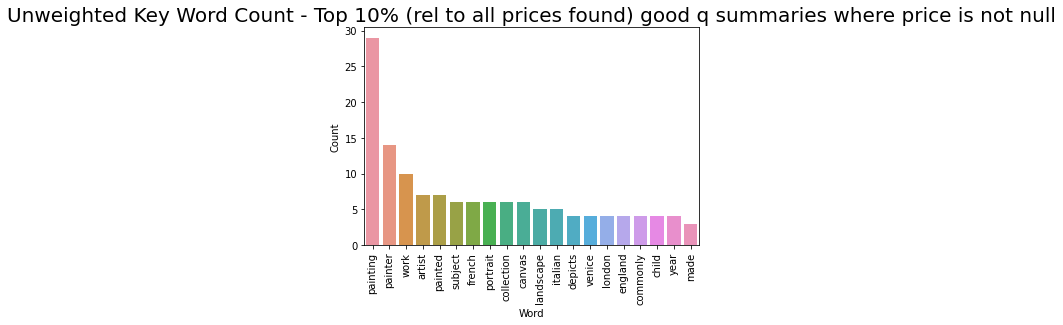

In [ ]:

# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=1)
# Extract keywords and scores from each artwork summary
keywords = for_summ_40_exp['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
text_weighted = []
word_orig_price = []
for i in range(0,len(keywords)-1):
    list = keywords.values[i]
    for component in list:
        text.append(str(component[0]))
        text_weighted.append(component[1])
        word_orig_price.append(for_summ_40['price_percentile_tot'].values[i])
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - Top 10% (rel to all prices found) good q summaries where price is not null", fontsize = 20)
plt.show()

In [ ]:
for i in range(0,3):
  print('word:',text[i])
  print('score:',text_weighted[i])
  print('rel. price: ',word_orig_price[i])

word: saintesmaries
score: 0.11369206228658875
rel. price:  89.48717948717949
word: town
score: 0.11369206228658875
rel. price:  89.48717948717949
word: painting
score: 0.13453835116331675
rel. price:  89.48717948717949


In [ ]:
df = pd.DataFrame(zip(text,text_weighted,word_orig_price),columns=['text','weight','price_percentile_reltotot'])
df.head()

,text,weight,price_percentile_reltotot
0,saintesmaries,0.113692,89.487179
1,town,0.113692,89.487179
2,painting,0.134538,89.487179
3,made,0.134538,89.487179
4,subject,0.185698,89.487179


In [ ]:
df['count']=df.groupby('text')['text'].transform('count')
df.head()

,text,weight,price_percentile_reltotot,count
0,saintesmaries,0.113692,89.487179,1
1,town,0.113692,89.487179,1
2,painting,0.134538,89.487179,29
3,made,0.134538,89.487179,3
4,subject,0.185698,89.487179,6


In [ ]:
new_df = df.groupby('text').agg('mean')
new_df['w_price'] = (1-new_df['weight'])*(new_df['price_percentile_reltotot']/100)*new_df['count']
new_df.head()

,weight,price_percentile_reltotot,count,w_price
text,,,,
acclaim,0.145516,24.145299,1.0,0.206318
acknowledged,0.125761,78.219373,1.0,0.683824
activity,0.063774,86.139601,1.0,0.806461
aesop,0.126114,91.965812,1.0,0.803677
afternoon,0.179621,47.521368,1.0,0.389855


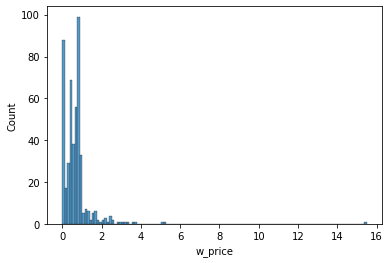

In [ ]:
sns.histplot(new_df['w_price'])

In [ ]:
weighted_price_arr = [new_df['w_price']]
#for_summ_40.apply(lambda x: stats.percentileofscore(prices_arr, x.price), axis =1)
new_df['w_price_perc']=new_df.apply(lambda x:stats.percentileofscore(weighted_price_arr, x.w_price),axis=1)
new_df.head()

,weight,price_percentile_reltotot,count,w_price,w_price_perc
text,,,,,
acclaim,0.145516,24.145299,1.0,0.206318,9850.0
acknowledged,0.125761,78.219373,1.0,0.683824,24650.0
activity,0.063774,86.139601,1.0,0.806461,35100.0
aesop,0.126114,91.965812,1.0,0.803677,34750.0
afternoon,0.179621,47.521368,1.0,0.389855,13850.0


In [ ]:
new_df['w_price'].nlargest(30)

text
painting        15.490295
work             5.243180
painter          5.133166
subject          3.781879
portrait         3.616446
collection       3.365508
artist           3.248013
canvas           3.035318
landscape        2.998427
painted          2.832873
year             2.584540
commonly         2.578064
french           2.489735
mythological     2.451904
early            2.433096
italian          2.414983
family           2.293552
oiloncanvas      2.246786
england          2.227691
king             2.153042
style            2.115479
made             2.037871
venice           1.929824
depicts          1.806367
flemish          1.780070
field            1.739478
couple           1.729607
baroque          1.722288
book             1.701703
series           1.691274
Name: w_price, dtype: float64

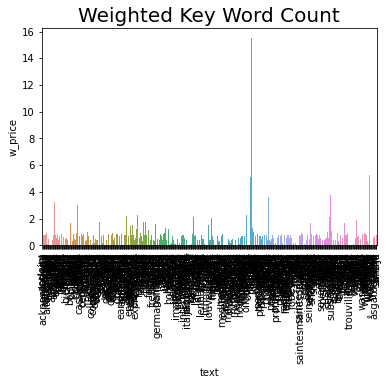

In [ ]:
sns.barplot(x= new_df.index, y=new_df['w_price'])
plt.xticks(rotation='vertical')
plt.title("Weighted Key Word Count", fontsize = 20)
plt.show()

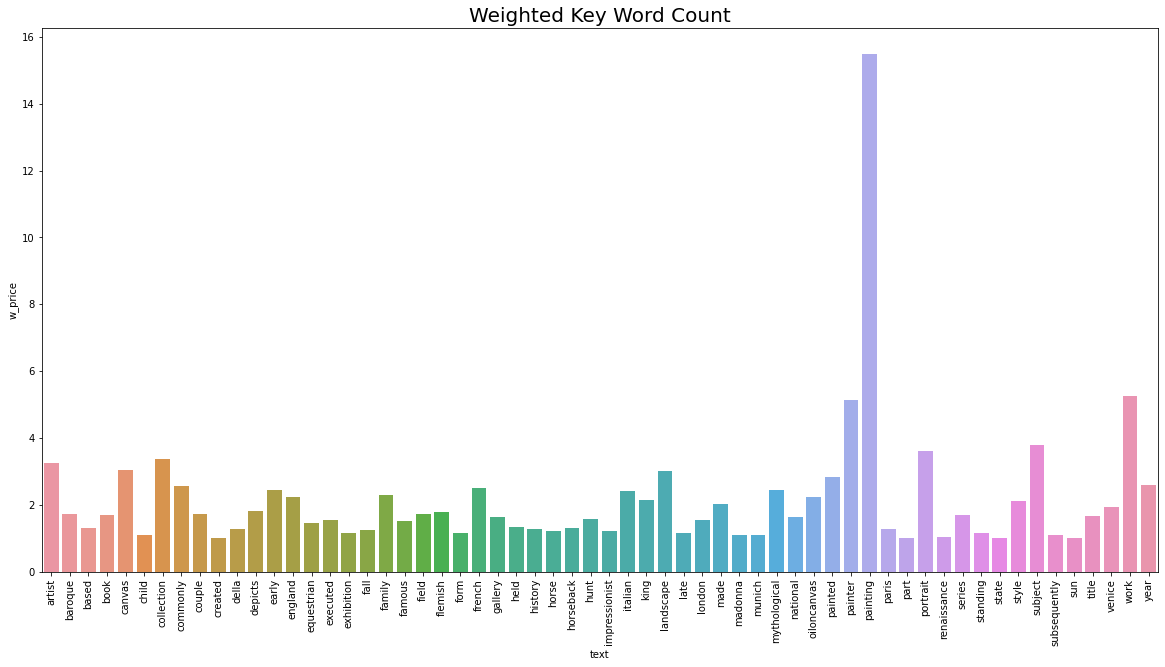

In [ ]:
top_words = new_df.loc[new_df['w_price']>1]
plt.figure(figsize=(20,10))
sns.barplot(x= top_words.index, y=top_words['w_price'])
plt.xticks(rotation='vertical')
plt.title("Weighted Key Word Count", fontsize = 20)

plt.show()

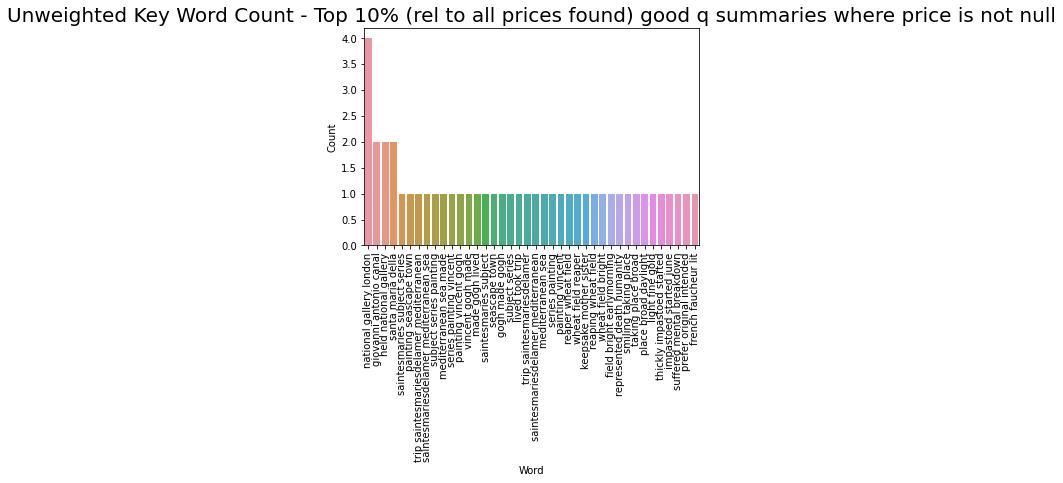

In [ ]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=3)
# Extract keywords and scores from each disclosure
keywords = for_summ_40_exp['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(40))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - Top 10% (rel to all prices found) good q summaries where price is not null", fontsize = 20)
plt.show()

In [ ]:
for_summ_40_exp['summary'].values[0:20]

array(['saintesmaries subject series painting vincent gogh made gogh lived took trip saintesmariesdelamer mediterranean sea made several painting seascape town',
       'reaper french faucheur lit reaper wheat field reaper wheat field reaper sun title given series three oiloncanvas painting vincent gogh reaping wheat field bright earlymorning sun artist reaper represented death humanity would wheat reaped however gogh consider work sad almost smiling taking place broad daylight sun flood everything light fine gold first painting thickly impastoed started june work piece continuing early september artist suffered mental breakdown took several week recover gogh created two stylized version early late september referred painting simply faucheur reaper said first done nature study second similarly sized version final painting completed studio gogh came prefer original intended third smaller version keepsake mother sister',
       'sir peter paul rubens dutch ˈrybəns june may flemish artist

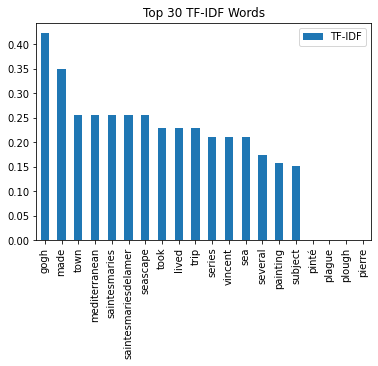

In [ ]:
## expensive tf-idf
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf = vectorizer.fit_transform(for_summ_40_exp['summary'])
# Create a dataframe of TFIDF
tfidf_df = pd.DataFrame(tfidf[0].T.todense(), 
                      index=vectorizer.get_feature_names_out(), 
                      columns=["TF-IDF"])
# Sort
tfidf_df = tfidf_df.sort_values('TF-IDF', ascending=False)
# Bar Plot
tfidf_df[:20].plot.bar(title="Top 30 TF-IDF Words");

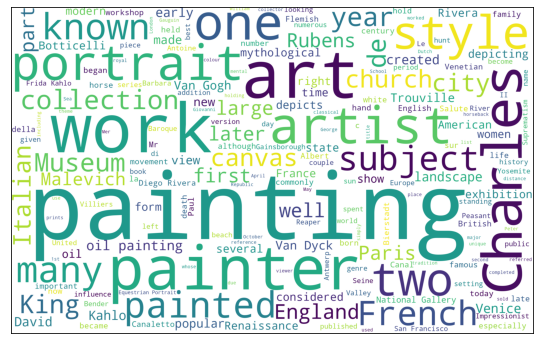

In [ ]:
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
art_sum = wc.generate(for_summ_40_exp['summary'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(art_sum);

In [ ]:
for_summ_40_exp.head()

,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name,ln_in_sum,match_perc,price_percentile,price_percentile_tot
18,18,Fishing Boats On The Beach At Saintes Maries,http://wikigallery.org/wiki/painting_14474/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Saintes-Maries is the subject of a series of p...,NaN,NaN,NaN,fishing boat beach saintes mary,Vincent Van Gogh,5062500.0,souvenir saintesmaries mediterrane boat beach ...,"[Vincent, Van, Gogh]",Gogh,True,40.000000,92.134831,97.663818
19,19,Wheat Field With Reaper And Sun,http://wikigallery.org/wiki/painting_9345/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,"Reaper (French: faucheur, lit. 'reaper'), Whea...",NaN,NaN,NaN,wheat field reaper sun,Vincent Van Gogh,31500000.0,field wheat field,"[Vincent, Van, Gogh]",Gogh,True,50.000000,99.438202,99.829060
403,403,Diana and her Nymphs Surprised by the Fauns (d...,http://wikigallery.org/wiki/painting_72728/Pet...,https://kuleuven-datathon-2023.s3.eu-central-1...,16,NaN,Sir Peter Paul Rubens (; Dutch: [ˈrybə(n)s]; 2...,NaN,NaN,NaN,diana nymph surprised faun detail,Peter Paul Rubens,3700500.0,diana nymph hunting modello,"[Peter, Paul, Rubens]",Rubens,True,40.000000,90.730337,97.150997
406,406,Lion Hunt c. 1621,http://wikigallery.org/wiki/painting_72822/Pet...,https://kuleuven-datathon-2023.s3.eu-central-1...,16,6.0,The Lion Hunt is a 1621 painting by Peter Paul...,NaN,NaN,NaN,lion hunt c,Peter Paul Rubens,2113800.0,marriage proxy princess maria medici king henr...,"[Peter, Paul, Rubens]",Rubens,True,66.666667,87.359551,95.356125
460,460,Two Tahitian Women,http://wikigallery.org/wiki/painting_119988/Pa...,https://kuleuven-datathon-2023.s3.eu-central-1...,18,10.0,Two Tahitian Women is an 1899 painting by Paul...,1899.0,0.0,Metropolitan Museum of Art,two tahitian woman,Paul Gauguin,894961.0,crouching tahitian woman seen back,"[Paul, Gauguin]",Gauguin,True,66.666667,83.707865,91.011396


In [ ]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=3)
# Extract keywords and scores from each disclosure
keywords = for_summ_40_exp['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(40))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - Top 10% (rel to all prices found) good q summaries where price is not null", fontsize = 20)
plt.show()

In [ ]:
### for every word in the summaries, find the prices

## remove all tokens that match artist names by first making a list of all artists from the artist_name column and then saying to remove if token in artist_name_tokens